In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [230]:
df=pd.read_csv('gym_members_exercise_tracking.csv')

In [232]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

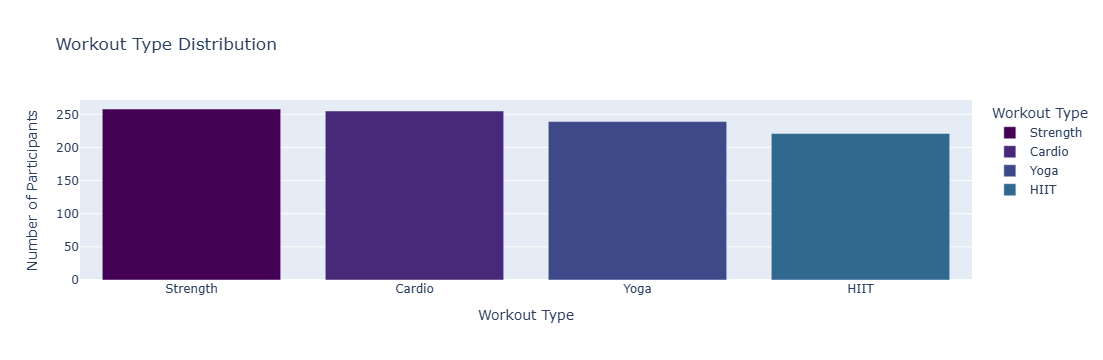

In [236]:
workout_counts = df['Workout_Type'].value_counts().reset_index()
workout_counts.columns = ['Workout_Type', 'Count']

# Create a bar plot using Plotly Express
fig = px.bar(
    workout_counts, 
    x='Workout_Type', 
    y='Count', 
    color='Workout_Type', 
    title='Workout Type Distribution',
    labels={'Workout_Type': 'Workout Type', 'Count': 'Number of Participants'},
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.show()

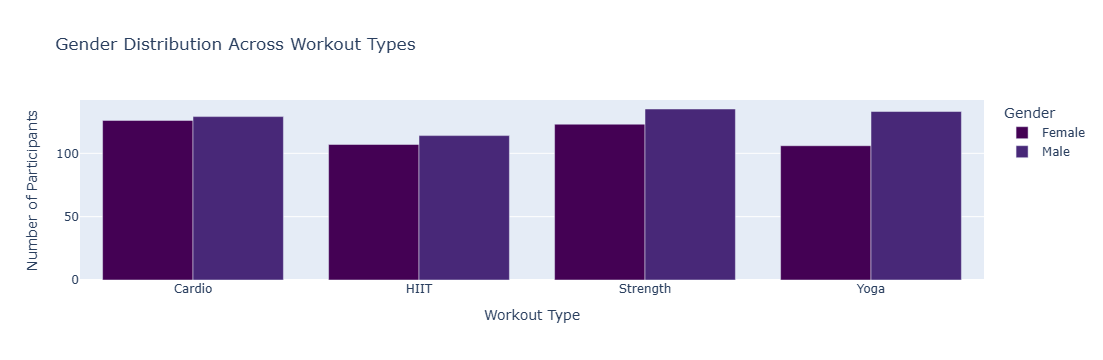

In [238]:
gender_distribution = df.groupby(['Workout_Type', 'Gender']).size().reset_index(name='Count')

fig1 = px.bar(
    gender_distribution,
    x='Workout_Type',
    y='Count',
    color='Gender',
    title='Gender Distribution Across Workout Types',
    labels={'Workout_Type': 'Workout Type', 'Count': 'Number of Participants'},
    barmode='group',color_discrete_sequence=px.colors.sequential.Viridis
    
)
fig_gender.show()


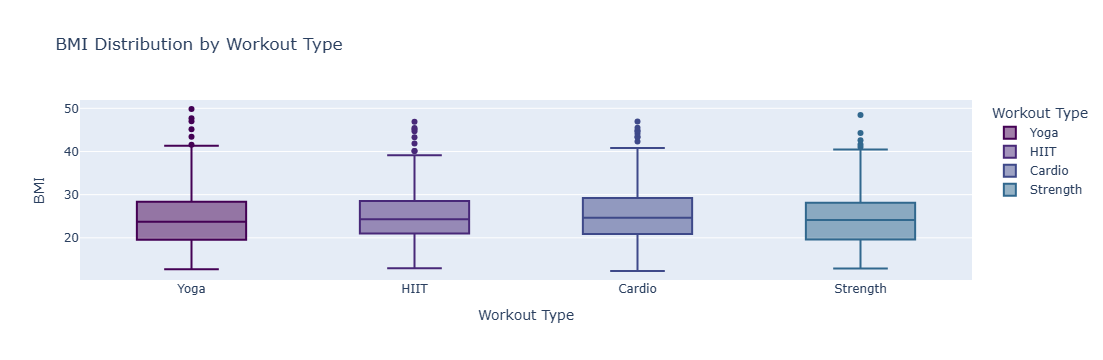

In [240]:
fig2 = px.box(
    df,
    x='Workout_Type',
    y='BMI',
    color='Workout_Type',
    title='BMI Distribution by Workout Type',
    labels={'Workout_Type': 'Workout Type', 'BMI': 'BMI'},
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig_bmi.show()


In [242]:
def classify_fat_percentage(fat_percentage):
    if fat_percentage < 18.33:
        return "Low"
    elif fat_percentage < 26.66:
        return "Medium"
    else:
        return "High"

# Example usage
df['Fat_Percentage'] = df['Fat_Percentage'].apply(classify_fat_percentage)

In [244]:
from sklearn.preprocessing import LabelEncoder

In [246]:
label_encoder = LabelEncoder()

In [248]:
categorical_columns = ['Gender','Workout_Type','Fat_Percentage' ]
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
label_encoder.fit_transform(df[col])

array([1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0,
       1, 0, 2, 2, 1, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0,
       2, 0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 2, 0,
       2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 2, 1, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2,
       0, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2,

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    int32  
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    int32  
 10  Fat_Percentage                 973 non-null    int32  
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

<Axes: >

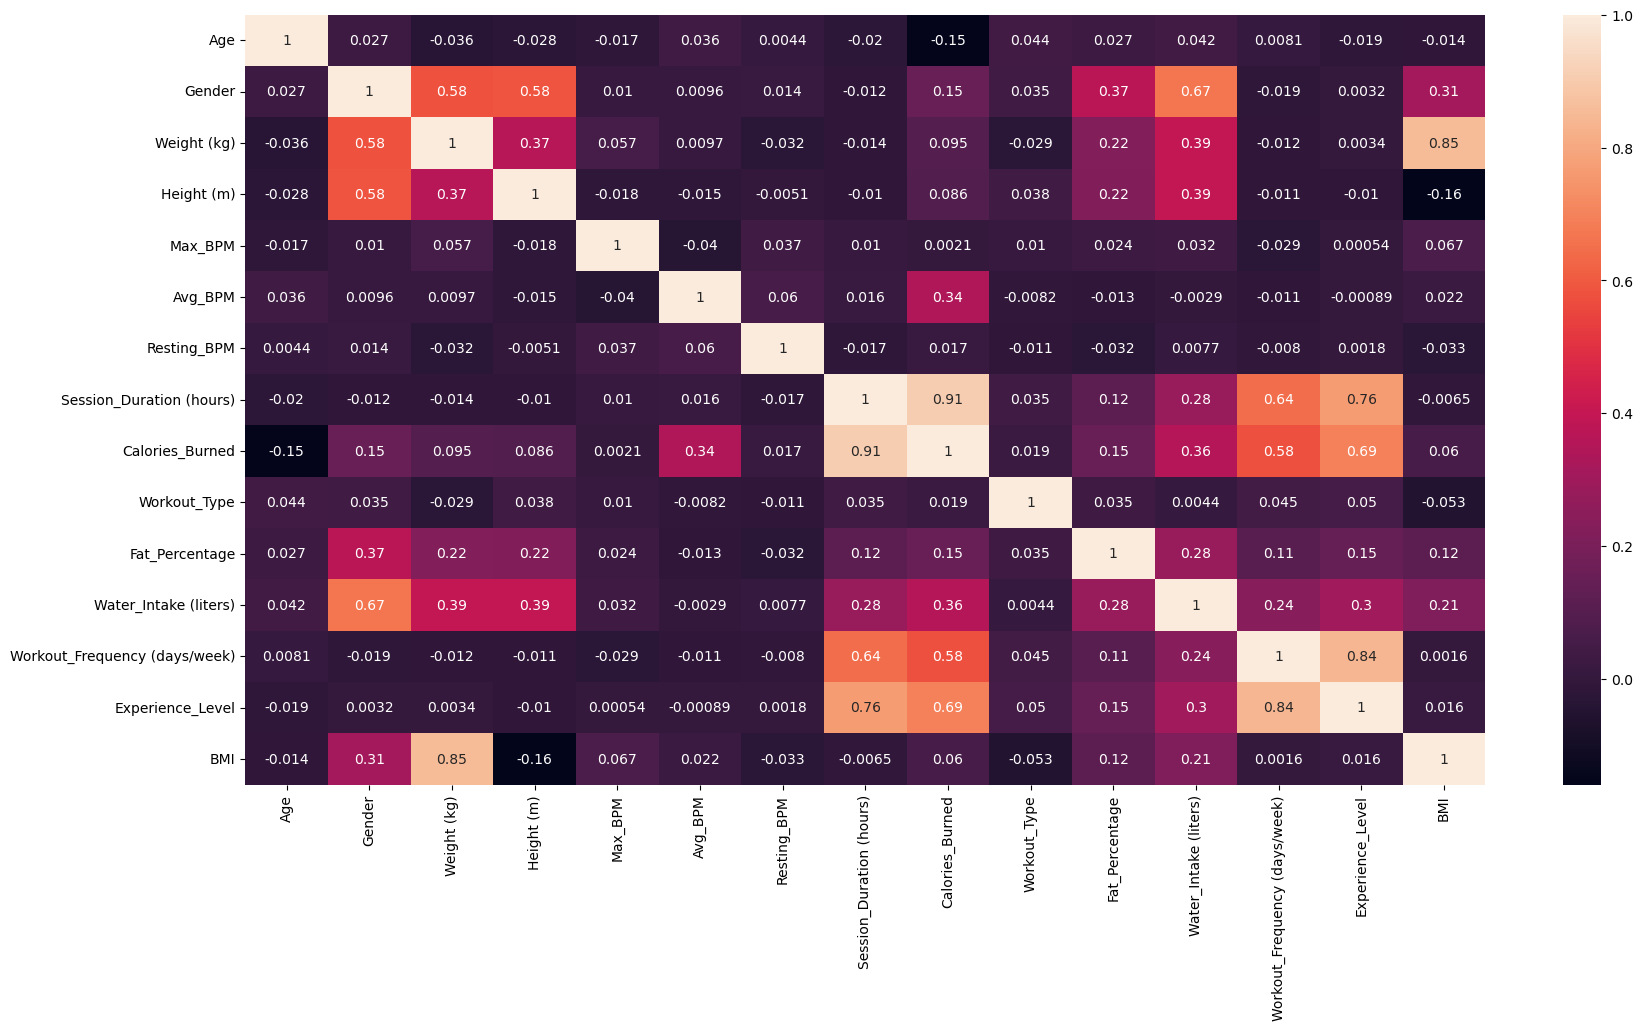

In [252]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True) 

In [254]:
X= df.drop(['Experience_Level'],axis=1).values
X

array([[ 56.  ,   1.  ,  88.3 , ...,   3.5 ,   4.  ,  30.2 ],
       [ 46.  ,   0.  ,  74.9 , ...,   2.1 ,   4.  ,  32.  ],
       [ 32.  ,   0.  ,  68.1 , ...,   2.3 ,   4.  ,  24.71],
       ...,
       [ 59.  ,   0.  ,  60.4 , ...,   2.7 ,   5.  ,  19.5 ],
       [ 32.  ,   1.  , 126.4 , ...,   2.1 ,   3.  ,  37.74],
       [ 46.  ,   1.  ,  88.7 , ...,   3.5 ,   2.  ,  33.38]])

In [257]:
y=df['Experience_Level']


In [259]:
from sklearn.model_selection import train_test_split

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [263]:
from sklearn.preprocessing import StandardScaler

In [265]:
sc = StandardScaler()

In [267]:
X_train = sc.fit_transform(X_train)
X_train

array([[-1.53304512,  0.93767108, -0.88120507, ...,  0.93198659,
         0.7420429 , -0.4972275 ],
       [ 0.03035419, -1.06647205, -0.61565746, ..., -1.56371867,
        -0.37030657, -0.37838126],
       [ 1.2646168 , -1.06647205,  0.09563078, ..., -1.23095797,
        -0.37030657,  0.1229061 ],
       ...,
       [-1.2861926 , -1.06647205, -0.8005924 , ..., -1.23095797,
         0.7420429 , -0.17420951],
       [ 1.01776428, -1.06647205, -0.81956009, ..., -0.39905621,
        -0.37030657,  0.0421516 ],
       [-0.79248755,  0.93767108, -0.71049589, ..., -1.06457762,
        -0.37030657, -0.32505282]])

In [269]:
X_test = sc.transform(X_test)
X_test

array([[-0.38106668,  0.93767108, -0.07982032, ..., -0.89819727,
         0.7420429 ,  0.30269913],
       [ 0.77091176,  0.93767108,  0.48921028, ...,  1.43112764,
         1.85439238,  0.08938536],
       [ 0.85319593,  0.93767108,  0.26633996, ...,  1.09836694,
        -0.37030657,  0.30879381],
       ...,
       [-1.45076095, -1.06647205, -1.07088193, ..., -0.73181692,
        -0.37030657, -1.11279009],
       [ 0.68862758,  0.93767108,  2.53772042, ...,  0.59922589,
        -1.48265605,  2.48154692],
       [-1.20390843,  0.93767108,  0.69311291, ...,  1.43112764,
         0.7420429 ,  0.42459271]])

# SVC Training Model

In [272]:
from sklearn.svm import SVC

In [274]:
classifier = SVC(kernel = 'linear', random_state =42)

In [276]:
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [278]:

y_train

967    2
365    1
559    1
33     1
31     2
      ..
106    1
270    1
860    2
435    1
102    2
Name: Experience_Level, Length: 778, dtype: int64

In [280]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 3, 2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 3, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 1, 3, 2, 2, 1, 3, 2, 1, 1, 2, 1, 2, 3, 3, 1, 2,
       1, 3, 2, 3, 3, 2, 1, 3, 3, 2, 1, 1, 3, 3, 1, 2, 2, 3, 2, 1, 2, 1,
       2, 1, 2, 1, 3, 3, 2, 2, 2, 2, 2, 3, 1, 3, 2, 1, 3, 3, 2, 3, 2, 3,
       2, 1, 1, 1, 3, 2, 2, 2, 1, 1, 2, 1, 1, 1, 3, 2, 3, 2, 1, 1, 2, 2,
       1, 1, 3, 2, 3, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 3, 1, 2, 2, 3, 2,
       2, 1, 1, 1, 3, 3, 3, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 3,
       1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 3],
      dtype=int64)

In [282]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[66 12  0]
 [ 9 66  0]
 [ 0  0 42]]


0.8923076923076924

In [284]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly', random_state=300, degree=3, C=100)
    
  

In [286]:
classifier.fit(X_train, y_train)

SVC(C=100, kernel='poly', random_state=300)

In [288]:
y_pred = classifier.predict(X_test)

In [290]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[67 11  0]
 [18 56  1]
 [ 0  2 40]]


0.8358974358974359

In [292]:
classifier = SVC(kernel = 'rbf', random_state = 150)

In [294]:
classifier.fit(X_train, y_train)

SVC(random_state=150)

In [296]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 3, 2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 3, 3, 3, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 1, 3, 2, 2, 1, 3, 2, 1, 1, 2, 1, 2, 3, 3, 1, 2,
       2, 3, 2, 3, 3, 2, 1, 3, 3, 2, 1, 1, 3, 3, 1, 2, 2, 3, 2, 1, 2, 1,
       2, 1, 2, 1, 3, 3, 2, 2, 1, 2, 2, 3, 1, 3, 2, 1, 3, 3, 2, 3, 2, 3,
       2, 1, 1, 1, 3, 2, 2, 2, 1, 1, 2, 1, 1, 1, 3, 2, 3, 2, 1, 1, 2, 2,
       1, 1, 3, 2, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 1, 2, 2, 3, 2,
       2, 1, 1, 1, 3, 3, 3, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 3,
       1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 3],
      dtype=int64)

In [298]:
y_test

199    2
538    3
174    1
464    1
66     3
      ..
578    1
327    2
878    2
849    1
801    3
Name: Experience_Level, Length: 195, dtype: int64

In [300]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[67 11  0]
 [ 8 67  0]
 [ 0  0 42]]


0.9025641025641026

In [306]:
import dash
from dash import dcc, html

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div(children=[
    html.H1(children='GYM_Excercises Dashboard'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),
    
    dcc.Graph(id='Workout Type Distribution', figure=fig),
    dcc.Graph(id='Gender Distribution Across Workout Types', figure=fig1),
    dcc.Graph(id='BMI Distribution by Workout Type', figure=fig2),
    
    
    
])

app.run_server(port=8051)